In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('IN_emissions_data.csv')

In [3]:
data

,Year,Per Acre Emissions,N,P,Potash,IN Corn Yield per Acre,Precipitation,Average Temperature,IN No Till Corn (Thousands of acres),IN Con Till Corn (Thousands of acres),IN Corn Cover Crop (Thousands of acres),Conventional Till,efficiency
0,1990,3.306718,139.0,75.0,111.0,129,50.44,54.4,479.255,824.200,0.000,4146.545,39.011486
1,1991,3.508214,135.0,78.0,112.0,92,37.56,54.8,723.426,1061.613,0.000,3764.961,26.224166
2,1992,3.376282,143.0,66.0,107.0,147,44.22,52.6,967.598,1299.025,0.000,3703.377,43.539021
3,1993,2.860590,134.0,68.0,114.0,132,50.78,52.0,1211.769,1536.438,0.000,2651.793,46.144325
4,1994,3.331703,147.0,74.0,112.0,144,31.63,53.3,1131.817,1534.523,0.000,3293.660,43.221141
5,1995,2.980580,132.0,68.0,107.0,113,35.49,52.7,1051.866,1532.608,0.000,2715.526,37.912083
6,1996,3.087821,138.0,64.0,110.0,123,56.85,51.3,971.914,1530.694,0.000,2947.392,39.833918
7,1997,3.416580,146.0,72.0,107.0,122,32.91,51.5,891.962,1528.779,0.000,3329.259,35.708221
8,1998,3.117395,146.0,61.0,118.0,137,47.03,56.0,968.033,1538.755,0.000,3043.212,43.946950
9,1999,3.341237,154.0,56.0,116.0,132,32.40,54.5,1044.103,1548.732,0.000,3077.165,39.506327


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data['cover_crop_dummy'] = data['IN Corn Cover Crop (Thousands of acres)'] != 0

In [6]:
y = data.pop('cover_crop_dummy')
X = data

In [7]:
len(X)

28

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=19)

In [9]:
hold_out = X_test.drop('efficiency', axis=1)

In [10]:
from imblearn.over_sampling import SMOTENC

Bootstrap

In [11]:
len(X_train)

22

In [12]:
bootstrap_data = X_train.join(pd.DataFrame(y_train))

In [13]:
size = int(len(X_train))
r_state = 19
while size < 100:
    random_sample = bootstrap_data.sample(n=7, replace=True, random_state=r_state)
    bootstrap_data = pd.concat([bootstrap_data, random_sample])
    size = len(bootstrap_data)
    r_state = r_state + 1

In [14]:
r_state

31

In [15]:
print(bootstrap_data.info())
print(r_state)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 3 to 9
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     106 non-null    int64  
 1   Per Acre Emissions                       106 non-null    float64
 2   N                                        106 non-null    float64
 3   P                                        106 non-null    float64
 4   Potash                                   106 non-null    float64
 5   IN Corn Yield per Acre                   106 non-null    int64  
 6   Precipitation                            106 non-null    float64
 7   Average Temperature                      106 non-null    float64
 8   IN No Till Corn (Thousands of acres)     106 non-null    float64
 9   IN Con Till Corn (Thousands of acres)    106 non-null    float64
 10  IN Corn Cover Crop (Thousands of acres)  106 non-nul

SMOTE

In [16]:
bootstrap_y = bootstrap_data.pop('cover_crop_dummy')
bootstrap_X = bootstrap_data

In [17]:
bootstrap_X[(bootstrap_X['Per Acre Emissions'] >= 2.87) & (bootstrap_X['Per Acre Emissions'] <= 2.88)]

,Year,Per Acre Emissions,N,P,Potash,IN Corn Yield per Acre,Precipitation,Average Temperature,IN No Till Corn (Thousands of acres),IN Con Till Corn (Thousands of acres),IN Corn Cover Crop (Thousands of acres),Conventional Till,efficiency
26,2016,2.871786,163.0,74.0,109.0,173,45.97,55.7,1377.716,2161.878,510.925,1930.406,60.241253
14,2004,2.875214,146.0,68.0,119.0,168,48.88,53.5,1011.467,1455.828,0.000,3062.705,58.430428
14,2004,2.875214,146.0,68.0,119.0,168,48.88,53.5,1011.467,1455.828,0.000,3062.705,58.430428
26,2016,2.871786,163.0,74.0,109.0,173,45.97,55.7,1377.716,2161.878,510.925,1930.406,60.241253
26,2016,2.871786,163.0,74.0,109.0,173,45.97,55.7,1377.716,2161.878,510.925,1930.406,60.241253
26,2016,2.871786,163.0,74.0,109.0,173,45.97,55.7,1377.716,2161.878,510.925,1930.406,60.241253
14,2004,2.875214,146.0,68.0,119.0,168,48.88,53.5,1011.467,1455.828,0.000,3062.705,58.430428
26,2016,2.871786,163.0,74.0,109.0,173,45.97,55.7,1377.716,2161.878,510.925,1930.406,60.241253
26,2016,2.871786,163.0,74.0,109.0,173,45.97,55.7,1377.716,2161.878,510.925,1930.406,60.241253
14,2004,2.875214,146.0,68.0,119.0,168,48.88,53.5,1011.467,1455.828,0.000,3062.705,58.430428


In [18]:
sm = SMOTENC(categorical_features=[1], random_state=19)

In [19]:
X_train_smote, y_train_smote = sm.fit_resample(bootstrap_X, bootstrap_y) 

In [20]:
len(X_train_smote[(X_train_smote['Per Acre Emissions'] >= 2.87) & (X_train_smote['Per Acre Emissions'] <= 2.88)])

36

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Per Acre Emissions', ylabel='IN Corn Yield per Acre'>

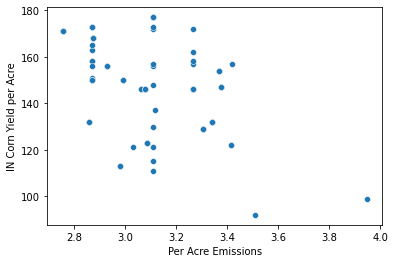

In [21]:
sns.scatterplot(X_train_smote['Per Acre Emissions'], X_train_smote['IN Corn Yield per Acre'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Per Acre Emissions', ylabel='IN Corn Yield per Acre'>

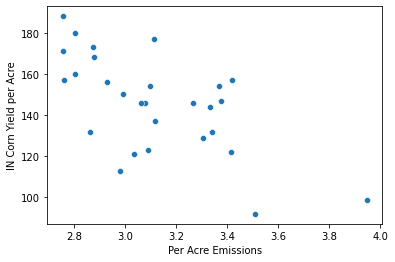

In [22]:
sns.scatterplot(data['Per Acre Emissions'], data['IN Corn Yield per Acre'])

In [23]:
smote_data = X_train_smote.drop('efficiency', axis=1)

In [24]:
smote_data.to_csv('/Users/Documents/GitHub/Capstone 2/SMOTE_data.csv', index=False)
hold_out.to_csv('/Users/Documents/GitHub/Capstone 2/hold_out_data.csv', index=False)

###Standardization is done as part of the pipeline during modeling notebook.###